In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [3]:
figure_num = 10 ** 3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
lw = np.array([0, -75, -75])
up = np.array([20, 75, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt,
                                                      fixed_params=fixed_params)
mcu_model = MCUChamferModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [4]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.0006789920931566573


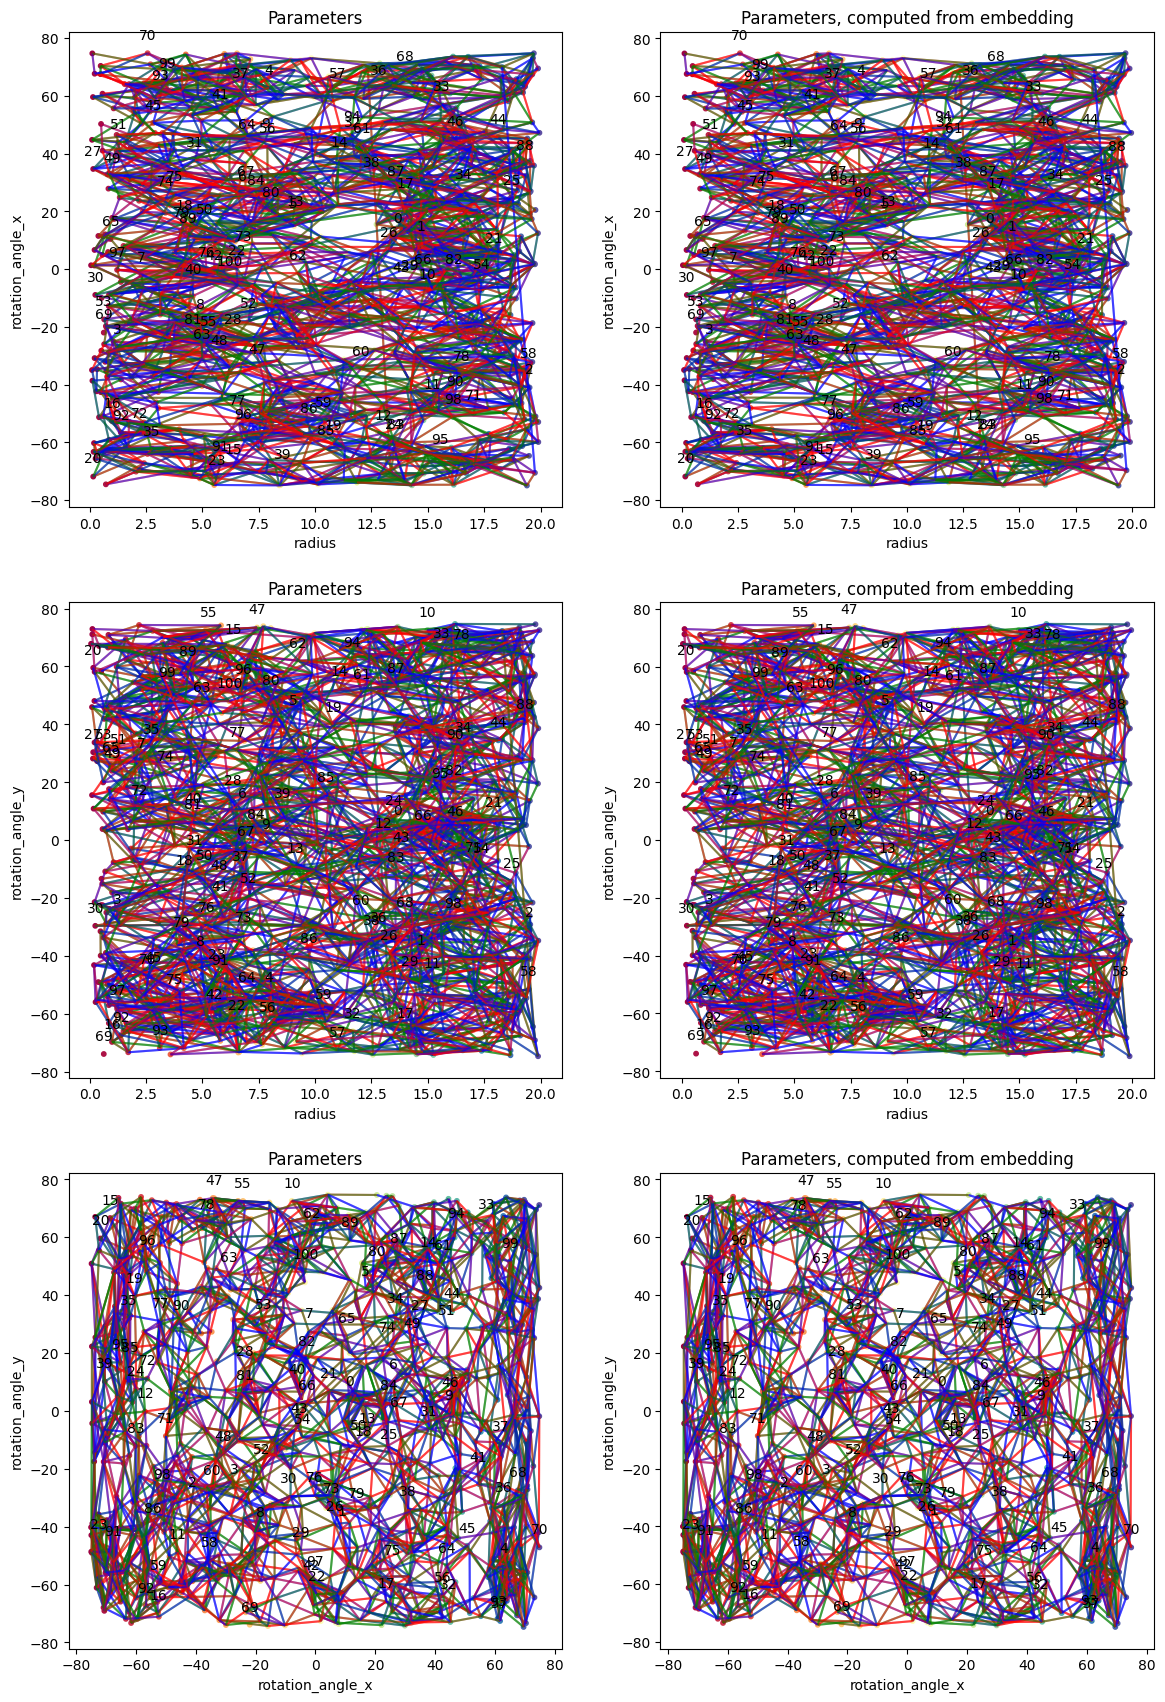

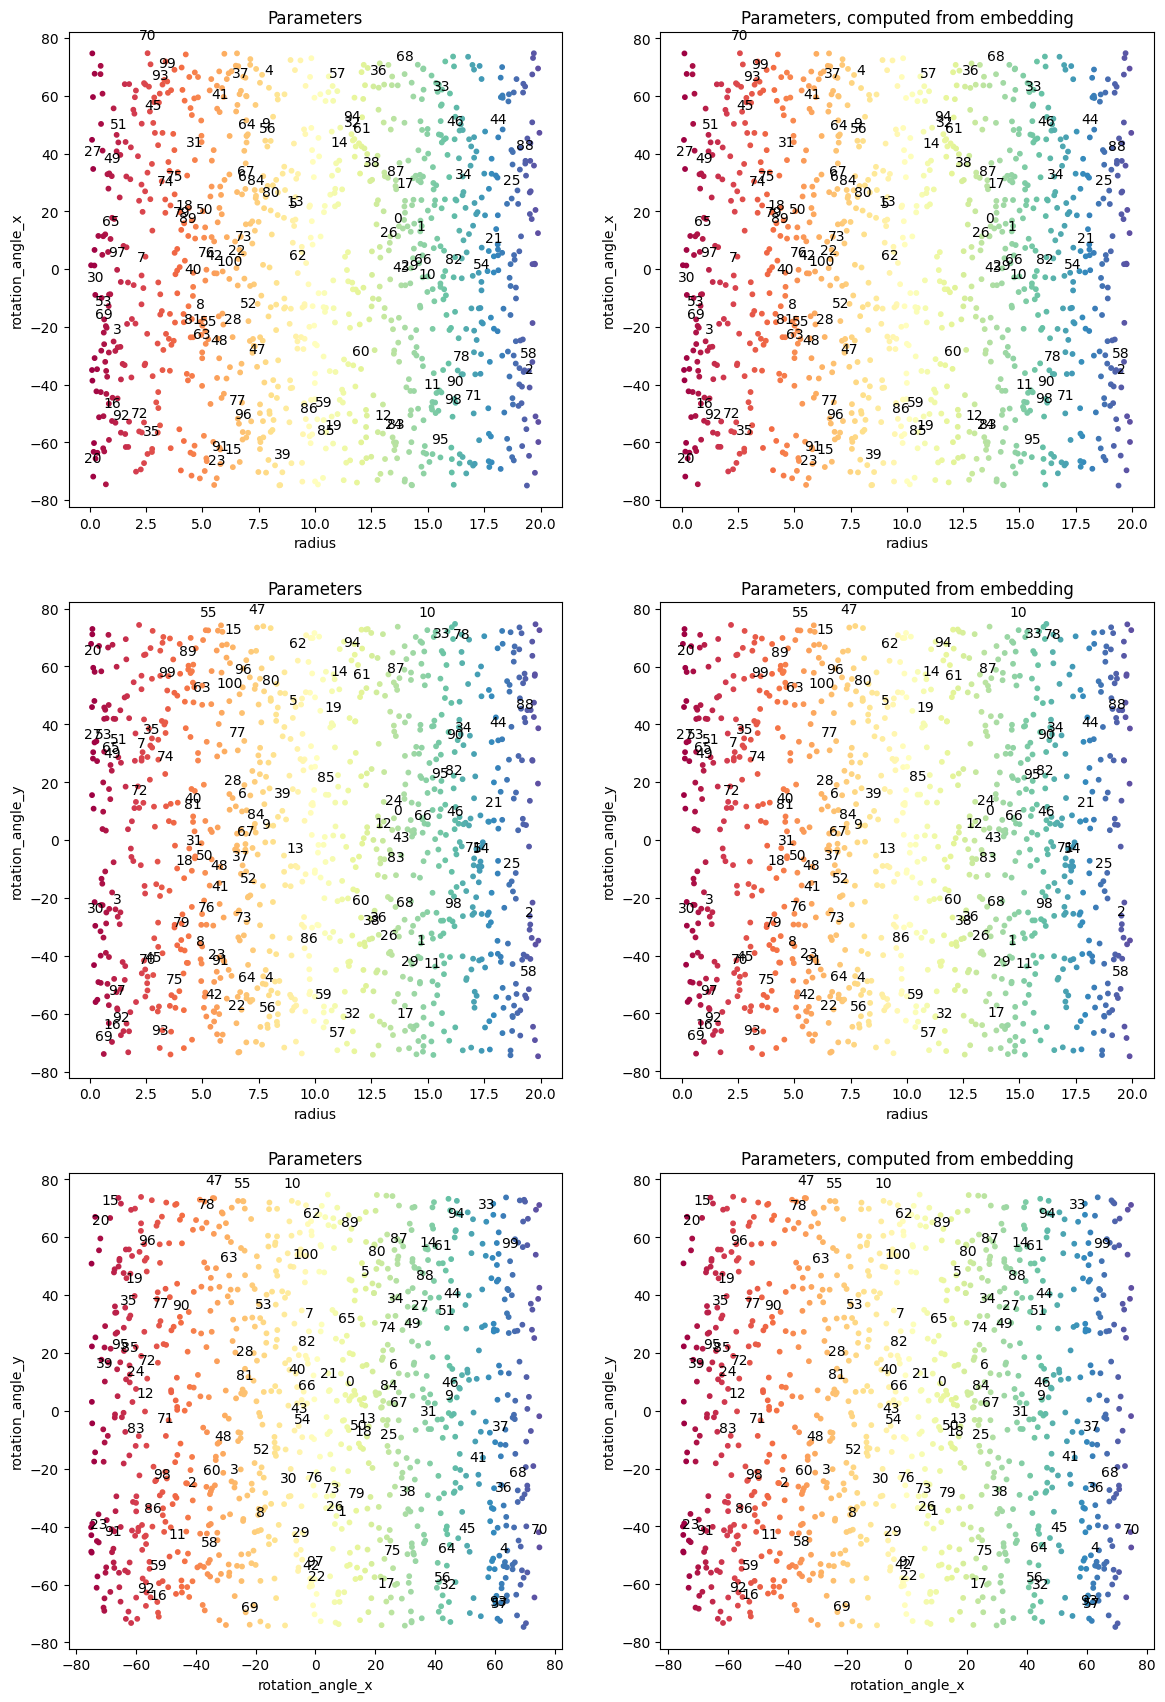

In [5]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [9]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points,
                                                                        figure_point_cnt=200, noise_level=0,
                                                                        pieces_cnt=5, test_data_size=20,
                                                                        same_value=False)

Finding neighbors: 281 ms , optimization: 1 ms
-----------
x_opt  = [  3.61868406 -64.41669254 -54.42132637], x_err = 0.042315957246338666
x_real = [  3.18576906 -64.8176244  -68.05828978]
Finding neighbors: 267 ms , optimization: 1 ms
-----------
x_opt  = [  4.24677434 -51.32686574 -63.53731699], x_err = 0.02742287574667156
x_real = [  3.52467174 -48.86571374 -69.99385112]
Finding neighbors: 266 ms , optimization: 1 ms
-----------
x_opt  = [  2.4396902  -64.01728824 -53.63899627], x_err = 0.05172418931247458
x_real = [  1.09494502 -66.30089253 -71.88489271]
Finding neighbors: 266 ms , optimization: 1 ms
-----------
x_opt  = [  1.75506448 -59.02061081 -58.18044143], x_err = 0.02550188961982259
x_real = [  1.48118907 -56.9401752  -61.48433638]
Finding neighbors: 268 ms , optimization: 1 ms
-----------
x_opt  = [  4.48383407 -68.65469374 -45.66477928], x_err = 0.025922522835359257
x_real = [  3.96399856 -73.15242016 -47.22818649]
Finding neighbors: 264 ms , optimization: 1 ms
-----------

In [10]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up,
                                                                                  cyl_generator.generate_cylinder_points,
                                                                                  figure_point_cnt=200, noise_level=0,
                                                                                  pieces_cnt=5, test_data_size=20,
                                                                                  same_value=False, baseline=True)

-----------
x_opt  = [  2.31527702 -56.55313417 -46.01590414], x_err = 0.05081085876972988
x_real = [  1.88816592 -60.70869605 -47.79872774]
-----------
x_opt  = [  0.34508689 -63.57369037 -55.14819096], x_err = 0.07071607777950518
x_real = [  0.913566   -64.56632251 -56.81676255]
-----------
x_opt  = [  4.18099884 -59.49944519 -71.85786486], x_err = 0.06166761772831594
x_real = [  3.38401021 -57.17827988 -70.1414271 ]
-----------
x_opt  = [  2.05900099 -70.10392362 -55.93867054], x_err = 0.05326608213557857
x_real = [  1.26103909 -70.34245079 -54.06698855]
-----------
x_opt  = [  1.75074897 -52.81453967 -66.03745742], x_err = 0.046097212705965104
x_real = [  1.67055366 -47.2570471  -71.83858284]
-----------
x_opt  = [  2.05900099 -70.10392362 -55.93867054], x_err = 0.09374647280592316
x_real = [  3.26277584 -68.82089961 -67.56088296]
-----------
x_opt  = [  0.34508689 -63.57369037 -55.14819096], x_err = 0.05479521421492655
x_real = [ 8.46667311e-03 -6.33495860e+01 -4.96128231e+01]
---

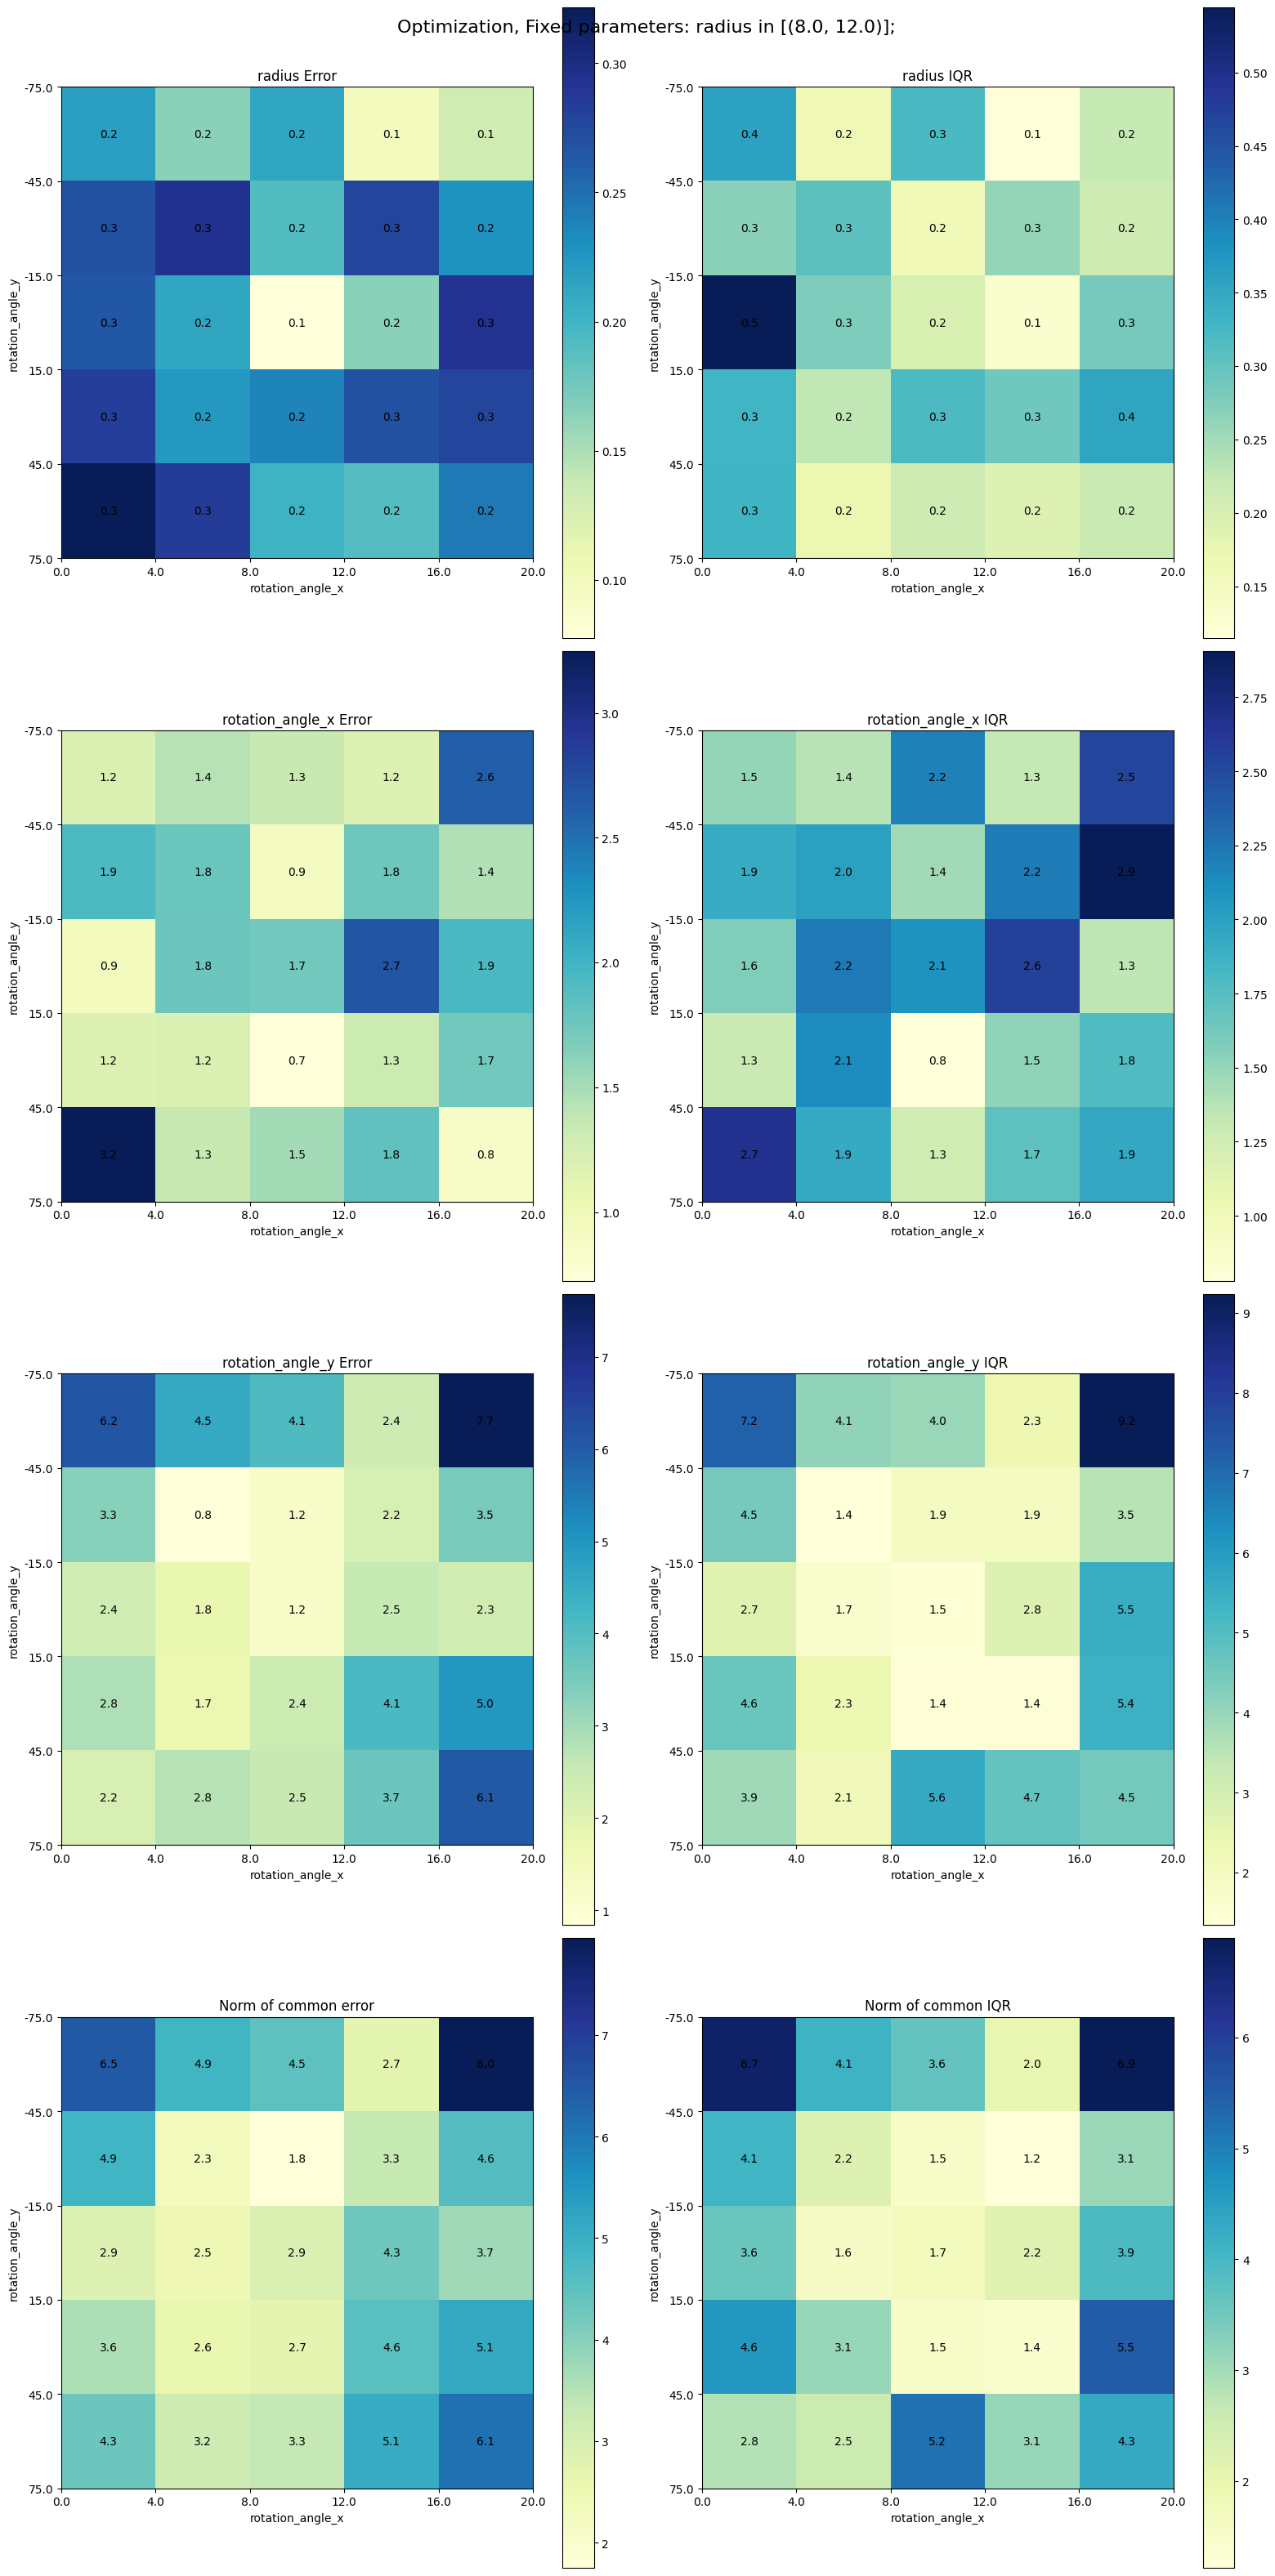

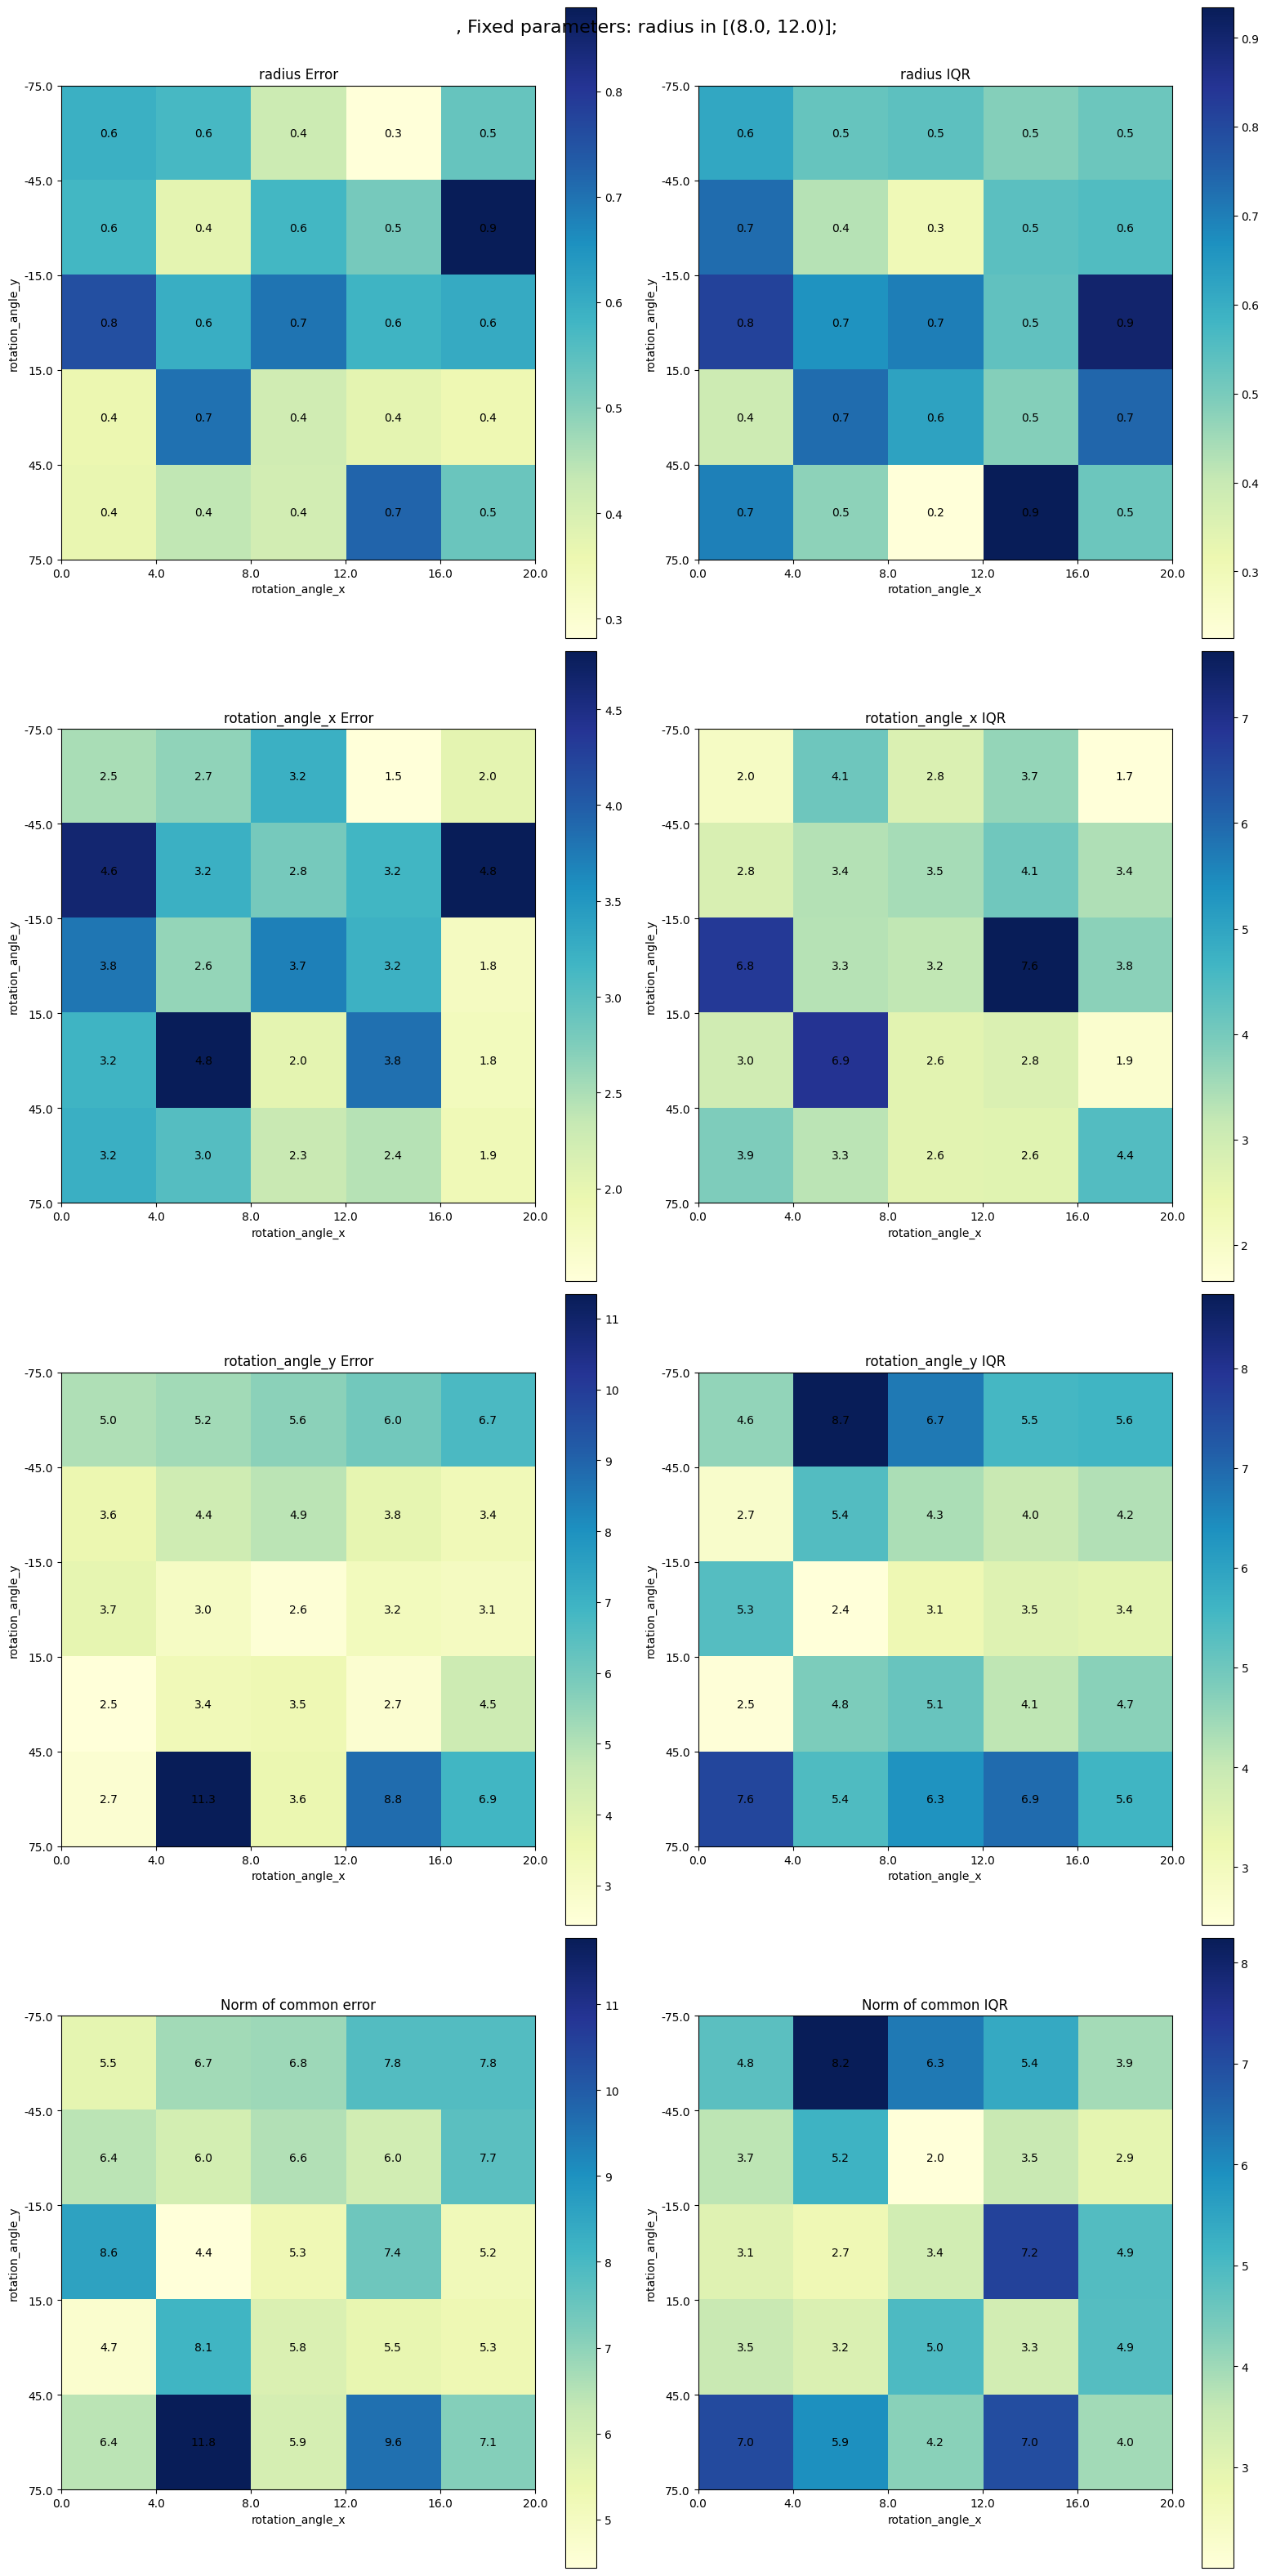

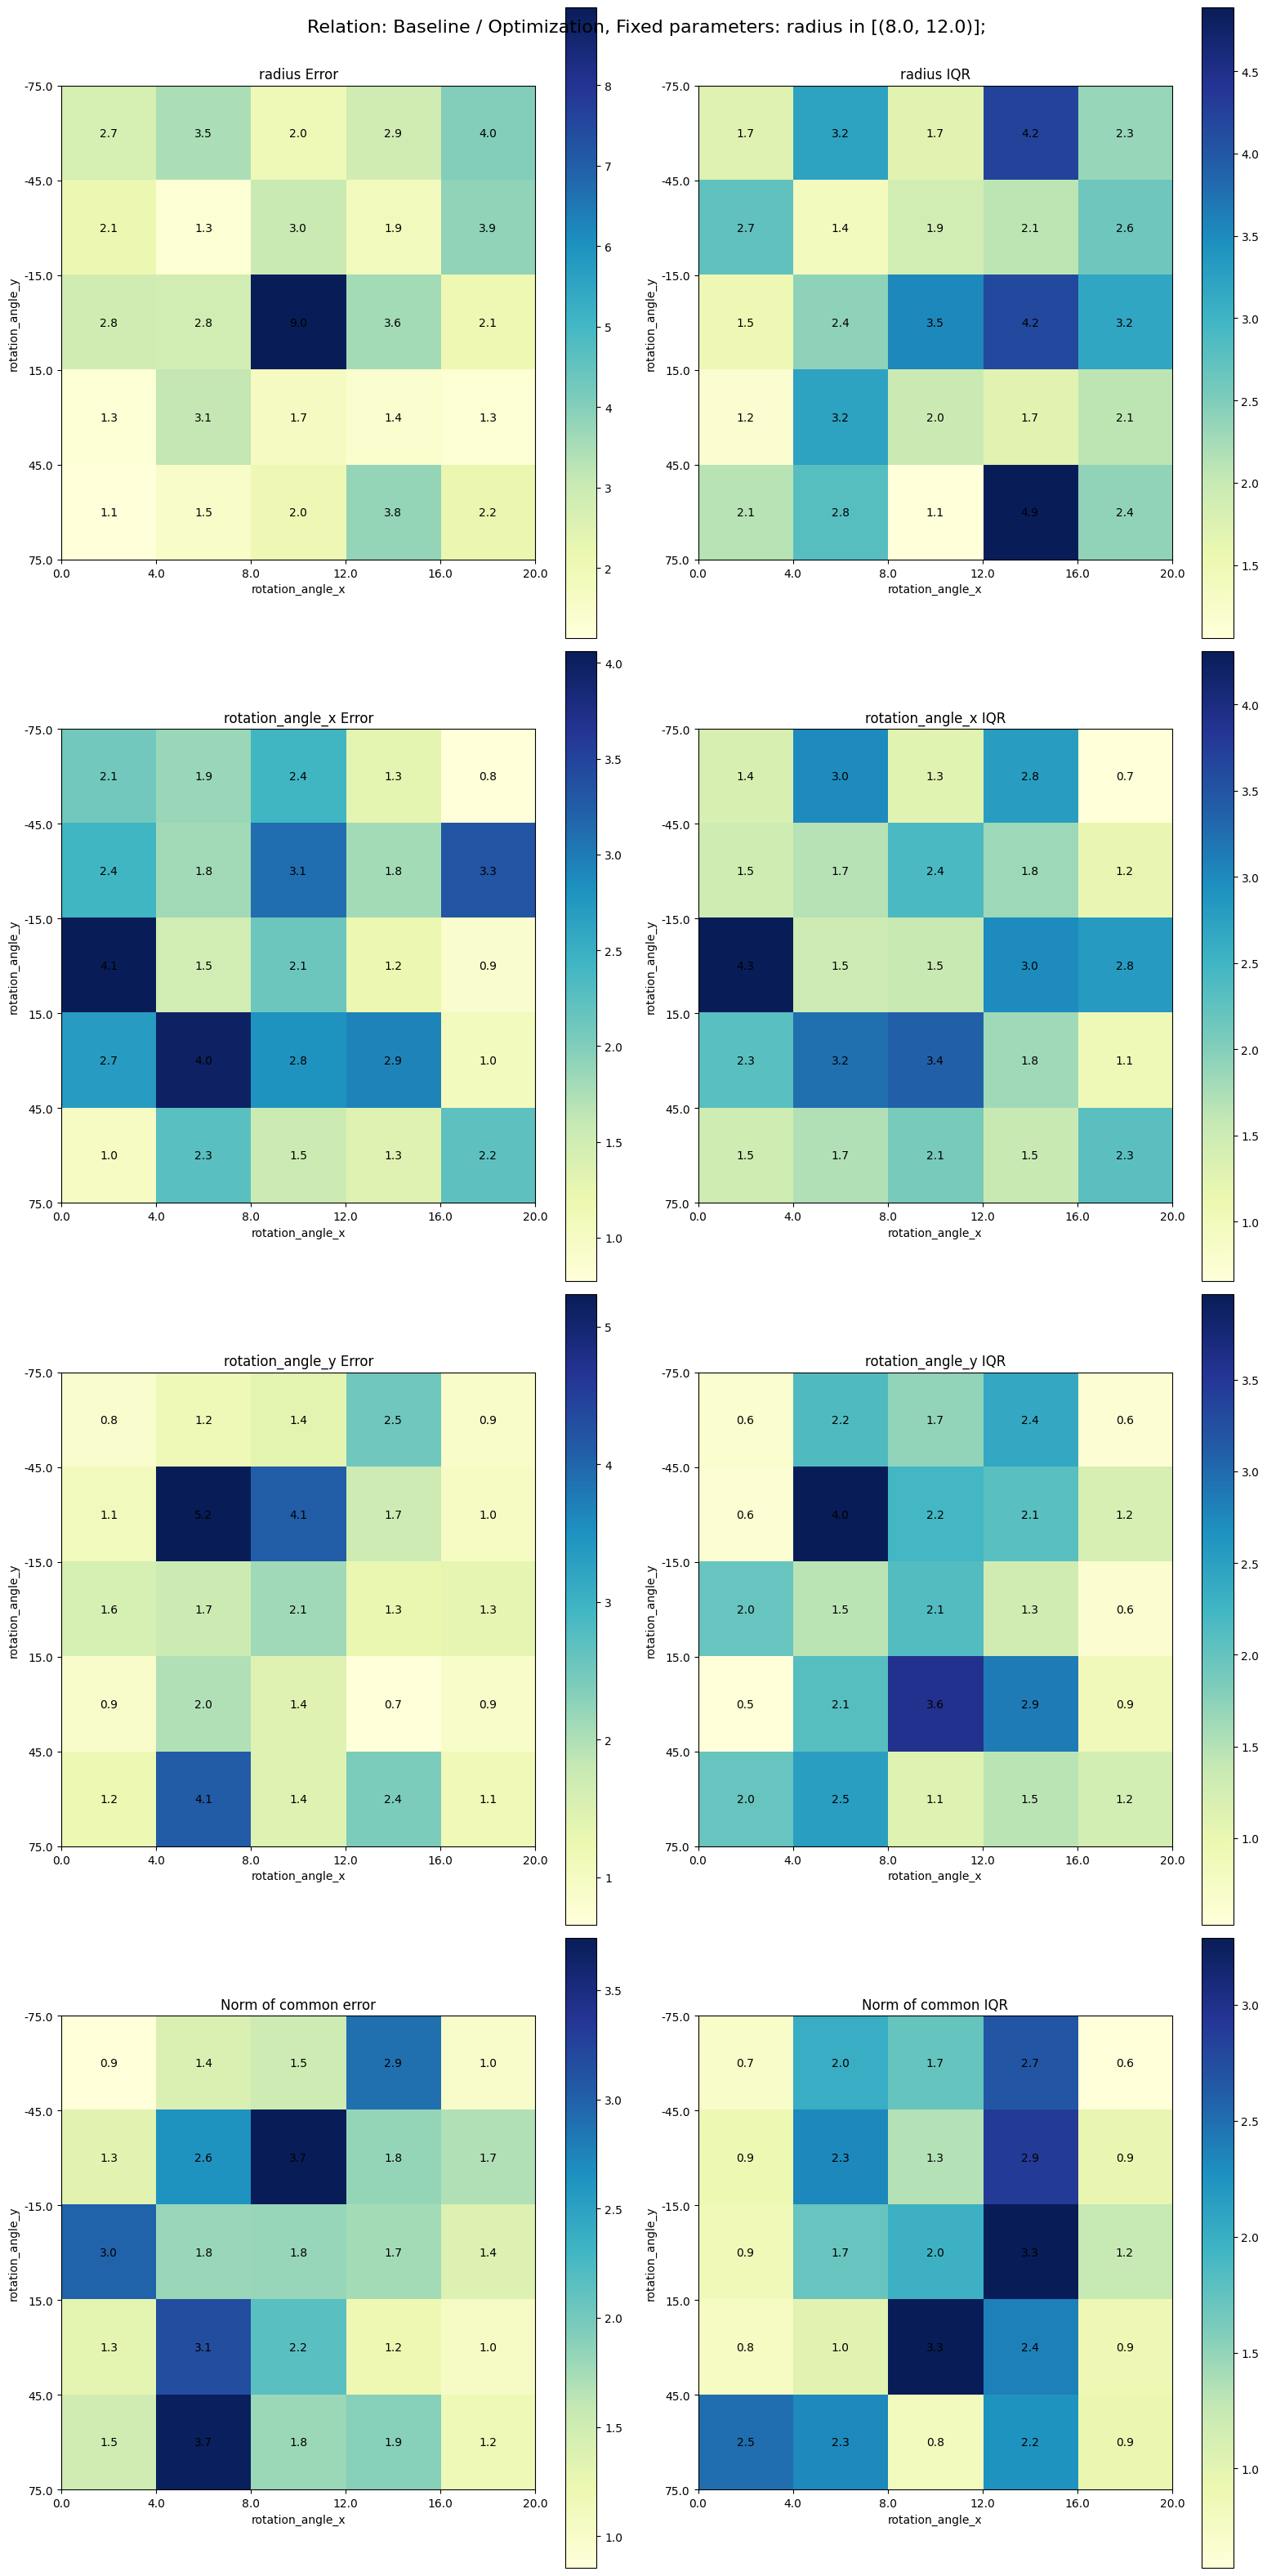

In [11]:
fixed_params_map = {0: 2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map,
                                                   filename=f"./images/ch_cyl_3d_{fixed_params_map}.png",
                                                   title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, fixed_params_map,
                                                   filename=f"images/ch_cyl_3d_{fixed_params_map}_base.png")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, fixed_params_map,
                                                   filename=f"images/ch_cyl_3d_{fixed_params_map}_rel.png",
                                                   title="Relation: Baseline / Optimization")